<a href="https://colab.research.google.com/github/prasadbabunaik/Social-media/blob/master/Jamboree_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement and Exploratory Data Analysis

**Problem Statement:**

Analyze what factors are important in graduate admissions and how these factors are interrelated among themselves. End goal is to predict one's chances of admission given the rest of the variables.


**Importing Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Importing the dataset**

In [3]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv" -O data.csv

--2023-07-11 05:02:55--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.67.66.31, 18.67.66.77, 18.67.66.49, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.67.66.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  15.80K  --.-KB/s    in 0s      

2023-07-11 05:02:55 (176 MB/s) - ‘data.csv’ saved [16176/16176]



In [4]:
data = pd.read_csv("data.csv")

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.shape

(500, 9)

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Checking the datatypes of all the columns

In [8]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Check for numerical and categorical variables

In [9]:
data.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

It can be observed from the above output that in University Rating and Research, there are very less unique values indicating that they are categorical variables.

In [10]:
data["University Rating"] = data["University Rating"].astype('category')
data["Research"] = data["Research"].astype('category')
data["LOR "] = data["LOR "].astype('category')
data["SOP"] = data["SOP"].astype('category')

Check for Missing Values

In [11]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There is no missing value in the data.

In [12]:
(data.describe()).T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Renaming column names and deleting Unnecessary column**

We don't need the column Serial No. and also the columns LOR and Chance of Admit have extra space which we will remove.

In [13]:
data.rename(columns={"LOR ": "LOR", "Chance of Admit ": "Chance of Admit"}, inplace=True)
data.drop(columns=["Serial No."], inplace=True)

**Univariate Analysis**

For Continuous Variables

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8dc76c5690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8dc76c5bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8dc76c53c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8dc76c6110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8dc76c63b0>],
 'means': []}

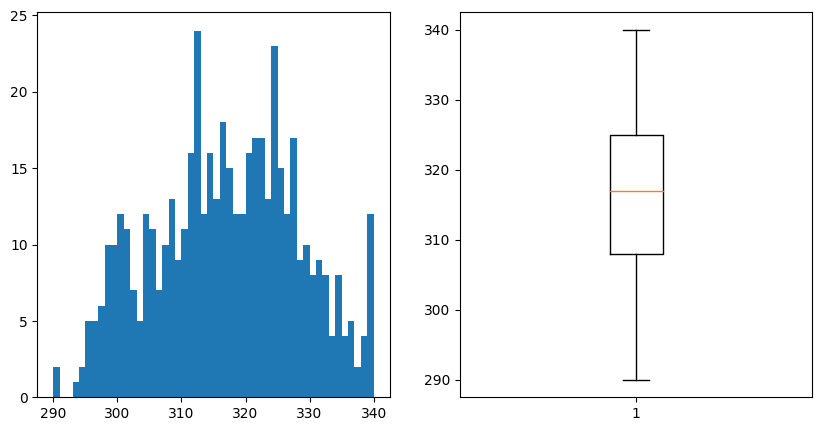

In [23]:
fig, ax =plt.subplots(1,2,  figsize=(10,5))

ax[0].hist(data["GRE Score"],bins=50 )

ax[1].boxplot(data["GRE Score"])

Seems the GRE score is apporximately guassian distributed. Also the average GRE Score lies some where between 310 and 320.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8dc74a4a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8dc74a4f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8dc74a4760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8dc74a54b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8dc74a5750>],
 'means': []}

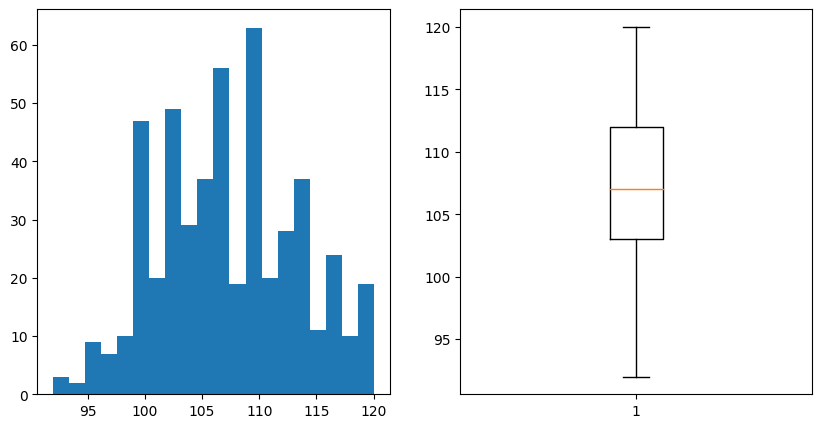

In [25]:
fig, ax =plt.subplots(1,2,  figsize=(10,5))

ax[0].hist(data["TOEFL Score"],bins=20 )
ax[1].boxplot(data["TOEFL Score"])

It seems that the TOEFL Score is also guassian distributed and the average TOEFL Score lies between 105 and 110.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8dc78714e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8dc7871a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8dc7871210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8dc7871f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8dc7872200>],
 'means': []}

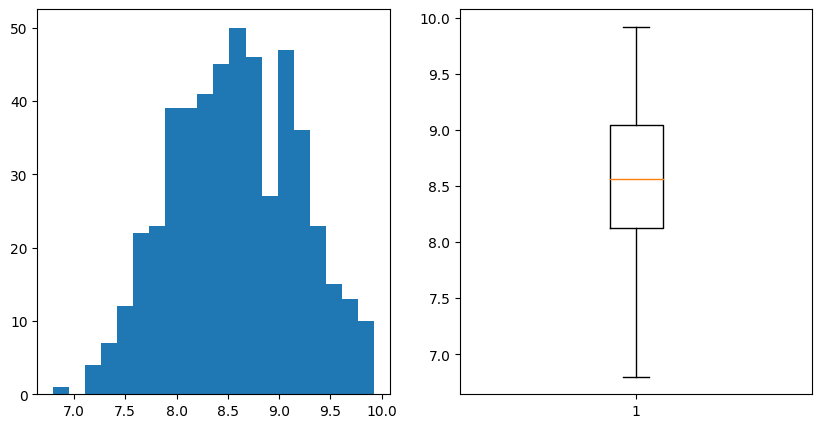

In [21]:
fig, ax =plt.subplots(1,2,  figsize=(10,5))

ax[0].hist(data["CGPA"],bins=20 )
ax[1].boxplot(data["CGPA"])

It seems that the CGPA is also approximately guassian distributed and the average CGPA lies around 8.5

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8dc776ae90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8dc776b3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8dc776abc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8dc776b910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8dc776bbb0>],
 'means': []}

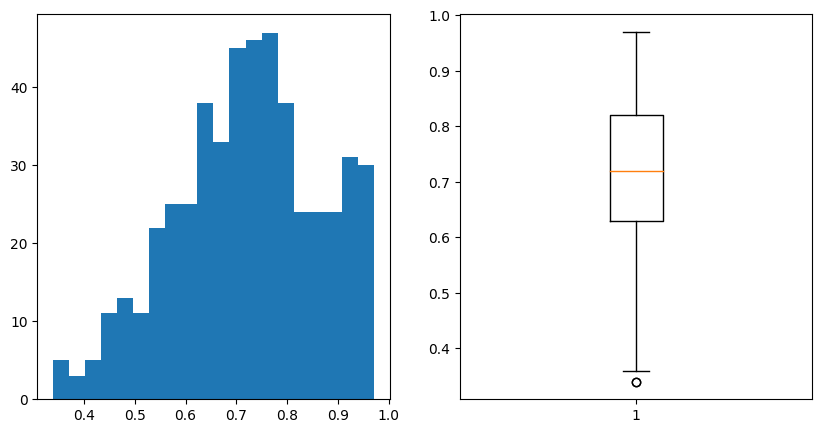

In [22]:
fig, ax =plt.subplots(1,2,  figsize=(10,5))

ax[0].hist(data["Chance of Admit"],bins=20 )
ax[1].boxplot(data["Chance of Admit"])

Chance of Admit is left skewed and the average chance of admit lies around 0.7.

For Categorical Variables

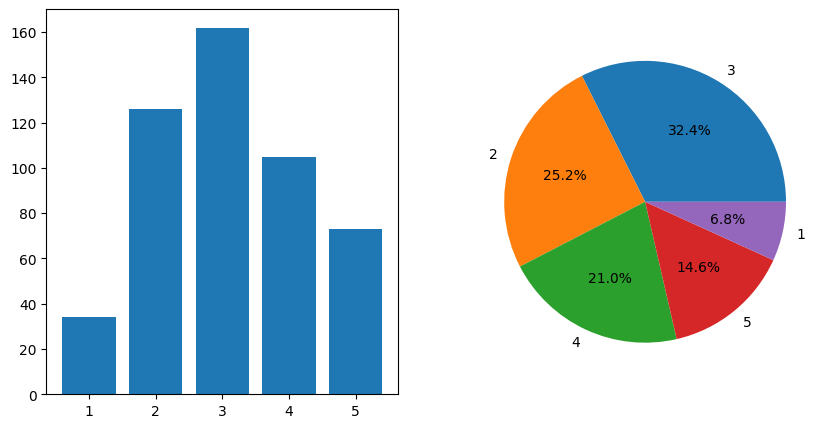

In [35]:
counts = data["University Rating"].value_counts().to_dict()

fig, ax =plt.subplots(1,2, figsize=(10,5))
ax[0].bar(counts.keys(), counts.values())
ax[1].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
fig.show()

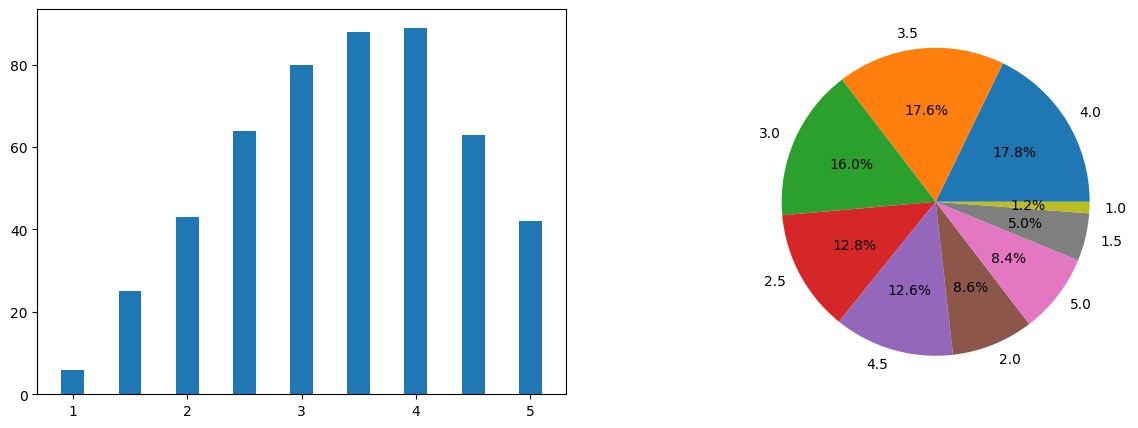

In [41]:
counts = data["SOP"].value_counts().to_dict()

fig, ax =plt.subplots(1,2, figsize=(15,5))
ax[0].bar(counts.keys(), counts.values(), width=0.2)
ax[1].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
fig.show()

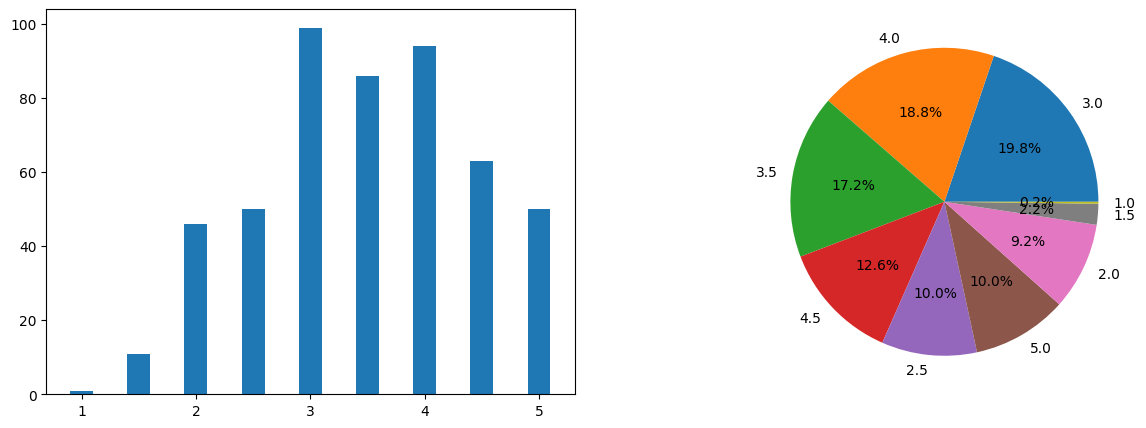

In [45]:
counts = data["LOR"].value_counts().to_dict()

fig, ax =plt.subplots(1,2, figsize=(15,5))
ax[0].bar(counts.keys(), counts.values(), width=0.2)
ax[1].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
fig.show()

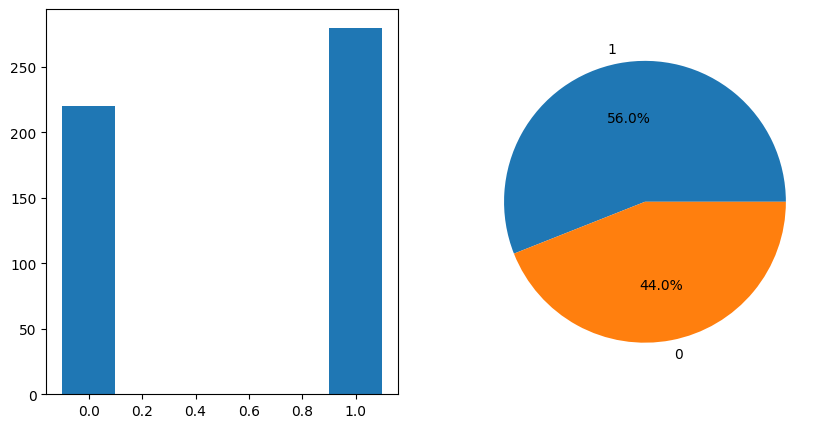

In [49]:
counts = data["Research"].value_counts().to_dict()

fig, ax =plt.subplots(1,2, figsize=(10,5))
ax[0].bar(counts.keys(), counts.values(), width=0.2)
ax[1].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
fig.show()

**Bivariate Analysis**

**1. GRE Score vs Chance of Admit**

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

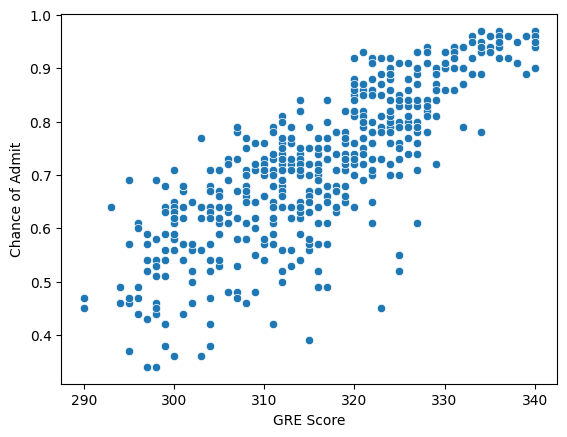

In [50]:
sns.scatterplot(data=data, x="GRE Score", y="Chance of Admit")

There is a strong linear relationship between the GRE score and Chance of Admit

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

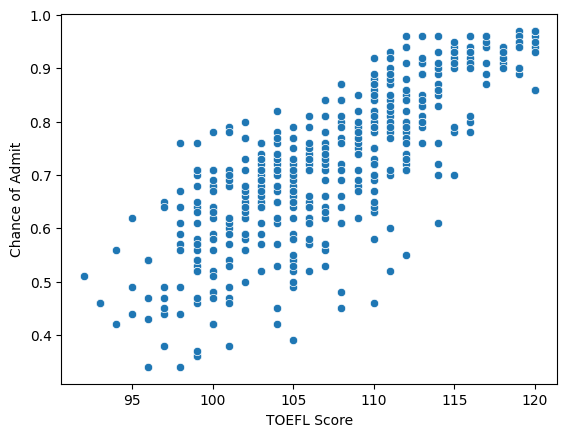

In [51]:
sns.scatterplot(data=data, x="TOEFL Score", y="Chance of Admit")

There is a strong linear relationship between the TOEFL score and chance of admit.

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

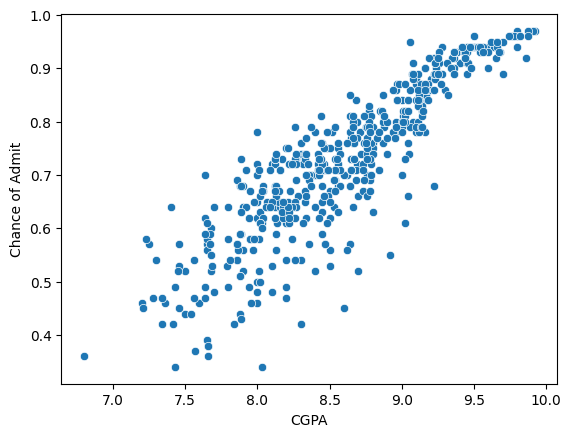

In [52]:
sns.scatterplot(data=data, x="CGPA", y="Chance of Admit")

It can be observed that there is a linear relationship between CGPA and chance of admit.

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

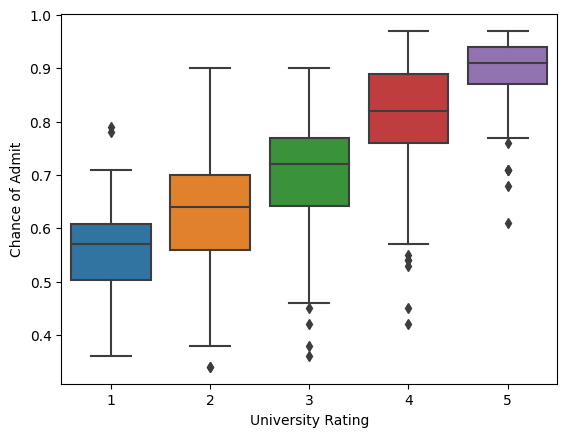

In [54]:
sns.boxplot(data=data, x="University Rating", y="Chance of Admit")

Chances of getting admitted as the university rating increses is quite unusual.

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

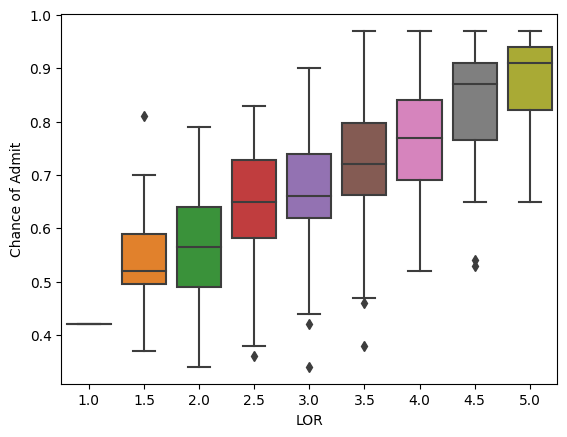

In [55]:
sns.boxplot(data=data, x="LOR", y="Chance of Admit")

Better LOR indicates better chance of admission.

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

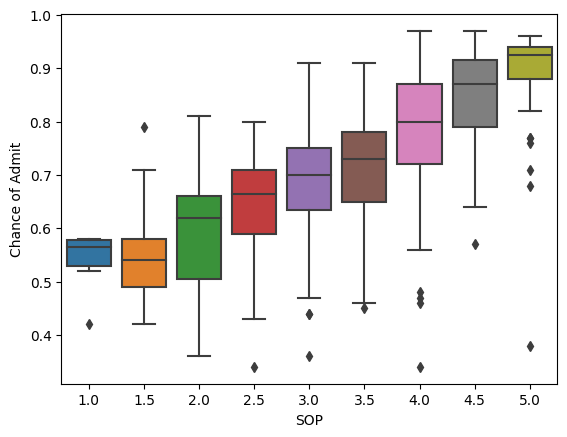

In [56]:
sns.boxplot(data=data, x="SOP", y="Chance of Admit")

It is obvious that Better SOP strength has better chances of getting admitted.

<Axes: xlabel='Research', ylabel='Chance of Admit'>

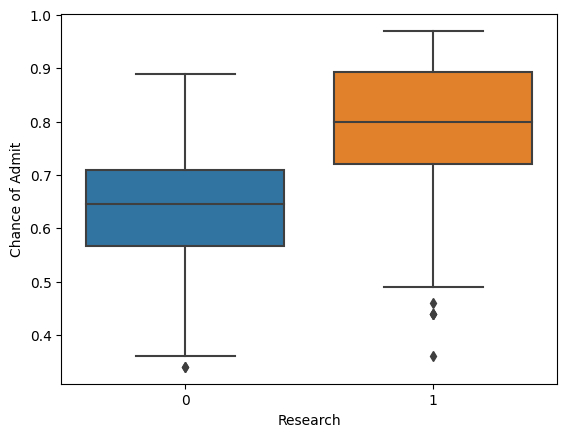

In [57]:
sns.boxplot(data=data, x="Research", y="Chance of Admit")

It seems that people with research experience have more chances of getting admitted than people with no research experience.

**Multivariate Analysis**

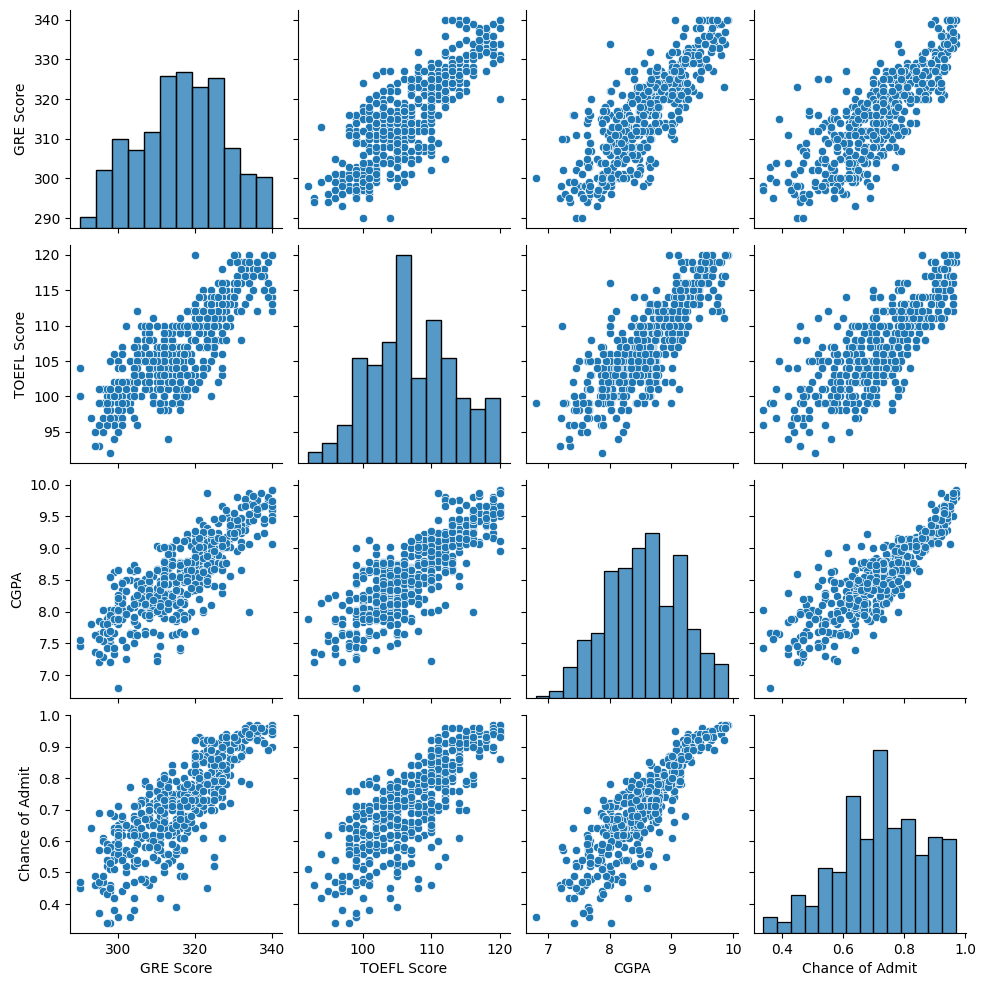

In [58]:
sns.pairplot(data)

<ipython-input-62-0043602fece3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="Blues", annot=True)


<Axes: >

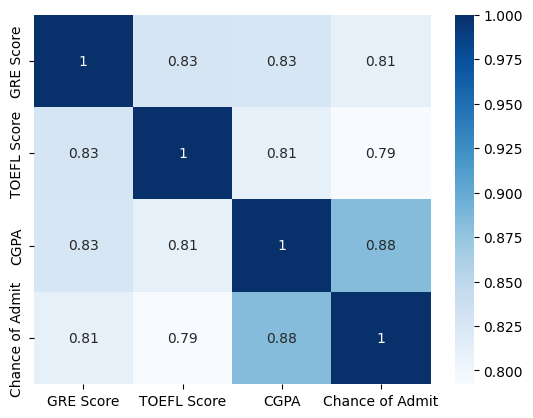

In [62]:
sns.heatmap(data.corr(), cmap="Blues", annot=True)

It can be observed that the highest correlation is between the CGPA and chance of admit (0.88).